#QUESTIONS
-Write a probabilistic programme in pymc3 which implements a Gaussian Processes Regress to find functions that model the relationship between the following.

x = [0, 0.1, 2, 4] & y = [4, 0.9, 3.6, 5]

In [ ]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
 #x and y values
x = np.array([0, 0.1, 2, 4])
y = np.array([4, 0.9, 3.6, 5])

Text(0, 0.5, 'y-values')

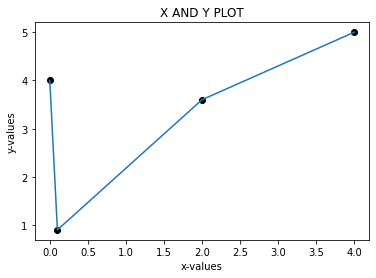

In [4]:
plt.plot(x,y)
plt.scatter(x,y, color='black')
plt.title('X AND Y PLOT')
plt.xlabel('x-values')
plt.ylabel('y-values')

In [5]:
import pymc3 as pm


In [6]:
x_1 = x[:,None]


In [7]:
with pm.Model() as Gaussion_Processes_model:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.Gamma('ℓ', 2, 0.25)
    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)
    # prior
    ϵ = pm.HalfNormal('ϵ', 0.5)
    # likelihood
    y_pred = gp.marginal_likelihood('y_pred', X=x_1, y=y, noise=ϵ)
    trace_reg = pm.sample(1000, step=None, chains=4)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (4 chains in 1 job)
NUTS: [ϵ, ℓ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


In [8]:
import arviz as az

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


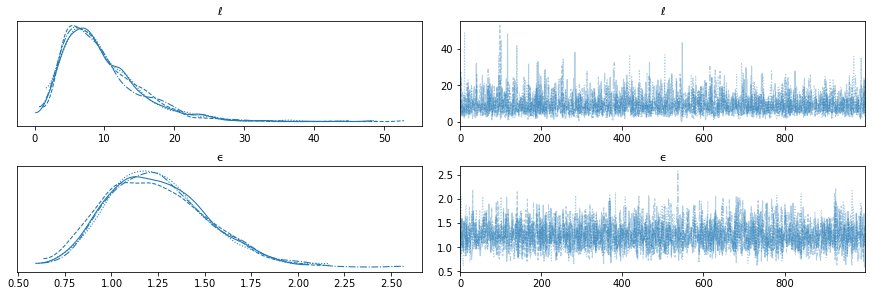

In [9]:
pm.traceplot(trace_reg,compact=2);